# Atividade Computacional 2

PPGEE0018: Processamento Digital de Sinais.

Aluno: Ricardo Augusto de Araújo Machado

## Parte 1 - Short Time Fourier Transform.

In [1]:
from scipy.io.wavfile import read
from pathlib import Path
import scipy.signal as sps
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (9, 6)
sns.set_theme(style="whitegrid")

Para realização da atividade foi utilizado uma gravação do tema de jazz "Round Midnight" com guitarra, bateria e baixo elétrico.

In [2]:
audio_path = Path('dados/round midnight.wav')
fs, dados_wav = read(audio_path)
dados_wav = dados_wav[:, 0]  # Pega apenas um canal do áudio

C:\Users\Ric\AppData\Local\Temp\ipykernel_36880\2992843450.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, dados_wav = read(audio_path)


Inicialmente, define-se janelas de Hamming, Hann e Blackman com comprimento de 30 ms.

In [3]:
COMPRIMENTO_JANELA_MS = 30  # ms
NUM_PONTOS = int(COMPRIMENTO_JANELA_MS * fs / 1000)
time = np.linspace(0, COMPRIMENTO_JANELA_MS / 1000, NUM_PONTOS)
hamming_window = sps.windows.hamming(NUM_PONTOS)
hann_window = sps.windows.hann(NUM_PONTOS)
blackman_window = sps.windows.blackman(NUM_PONTOS)

Plotagem das janelas utilizadas.

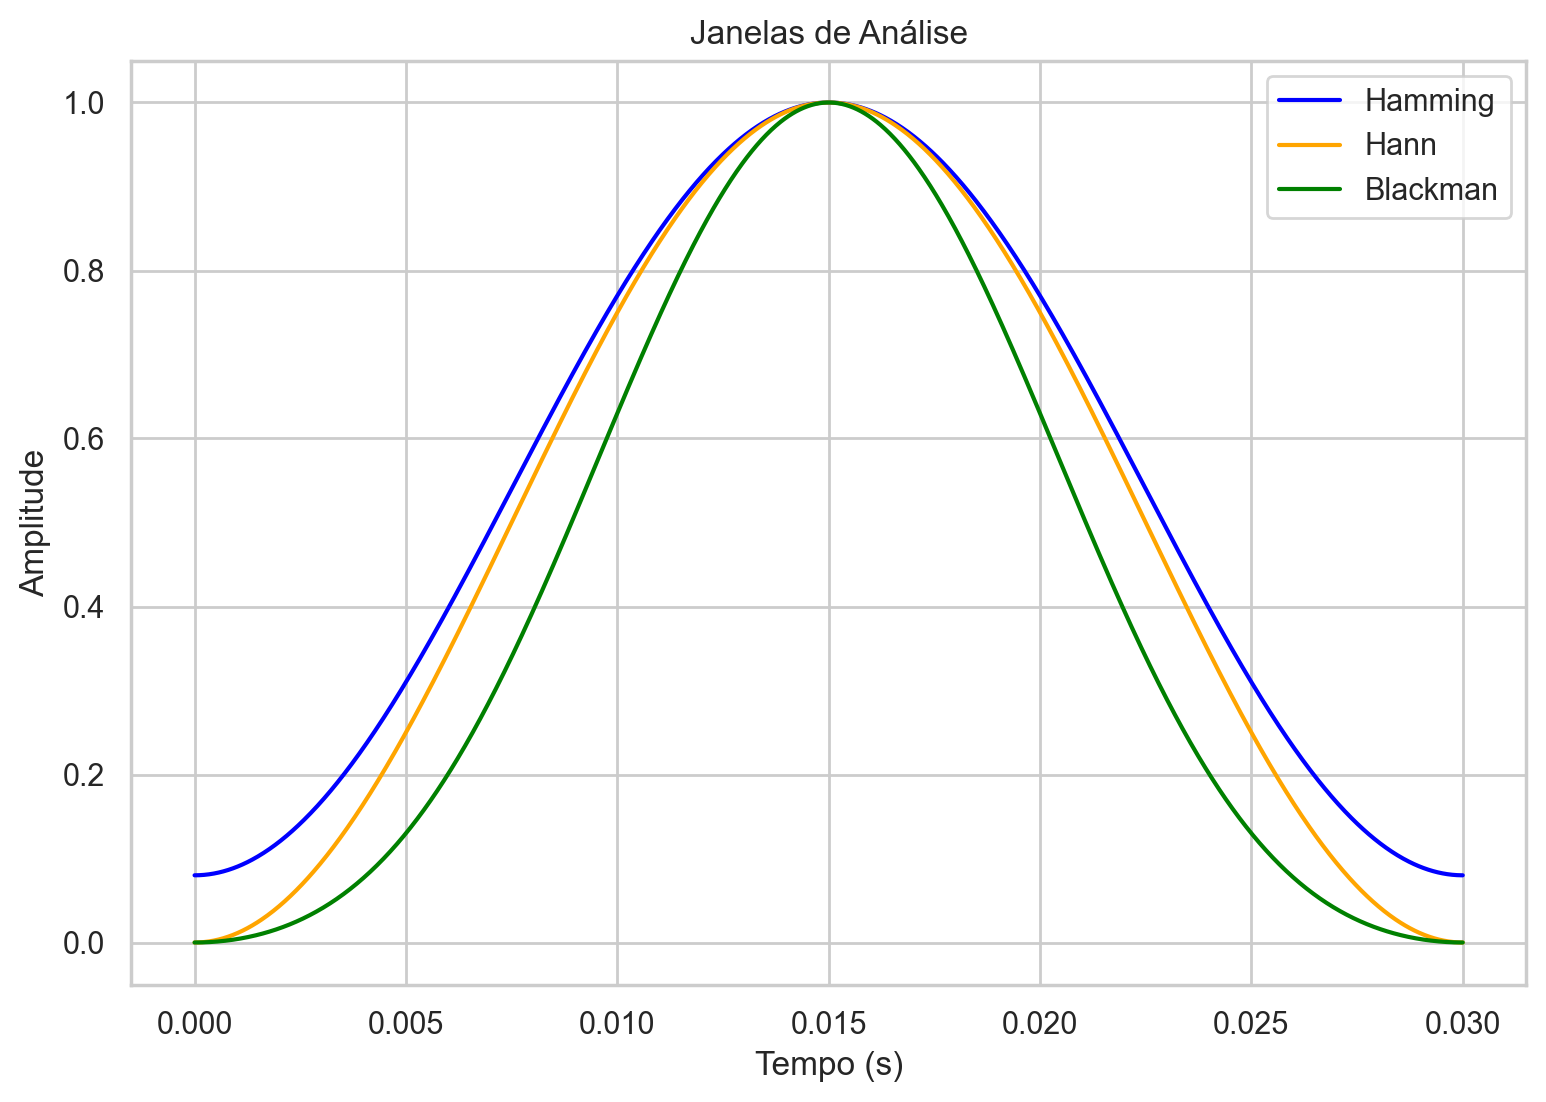

In [4]:
#Plot das janelas
sns.lineplot(x=time, y=hamming_window, label='Hamming', color='blue')
sns.lineplot(x=time, y=hann_window, label='Hann', color='orange')
sns.lineplot(x=time, y=blackman_window, label='Blackman', color='green')
plt.title('Janelas de Análise')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()

Criação da função para calcular a Short Time Fourier Transform do sinal dada um determinada janela e um hop size.

In [5]:
def plotar_espectrograma(dado_wav, window: np.ndarray, hop_size: int, fs: float, output_name:str="",freq_max:int = 2000) -> None:
    # Calcular a STFT
    freq, tempo, matriz_stft = sps.stft(dado_wav, fs=fs, window=window, nperseg=len(window), noverlap=len(window)-hop_size, scaling='spectrum')
    espectrograma_audio = np.abs(matriz_stft) ** 2

    idx_max = np.argmin(np.abs(freq - freq_max))
    freq = freq[:idx_max]
    espectrograma_audio = espectrograma_audio[:idx_max, :]

    # Plotar o espectrograma
    sns.heatmap(10 * np.log10(espectrograma_audio + 1e-10), cmap='flare_r')
    plt.xticks(ticks=np.linspace(0, len(tempo)-1, 10), labels=np.round(np.linspace(0, tempo[-1], 10), 2))
    plt.yticks(ticks=np.linspace(0, len(freq)-1, 10), labels=np.round(np.linspace(0, freq[-1], 10)/1000, 2))
    plt.xlabel('Tempo (s)')
    plt.ylabel('Frequência (kHz)')
    plt.title(f'Espectrograma do áudio (até {freq_max/1000} kHz)')
    plt.savefig(f'espectrograma_{output_name}.png')
    plt.show()


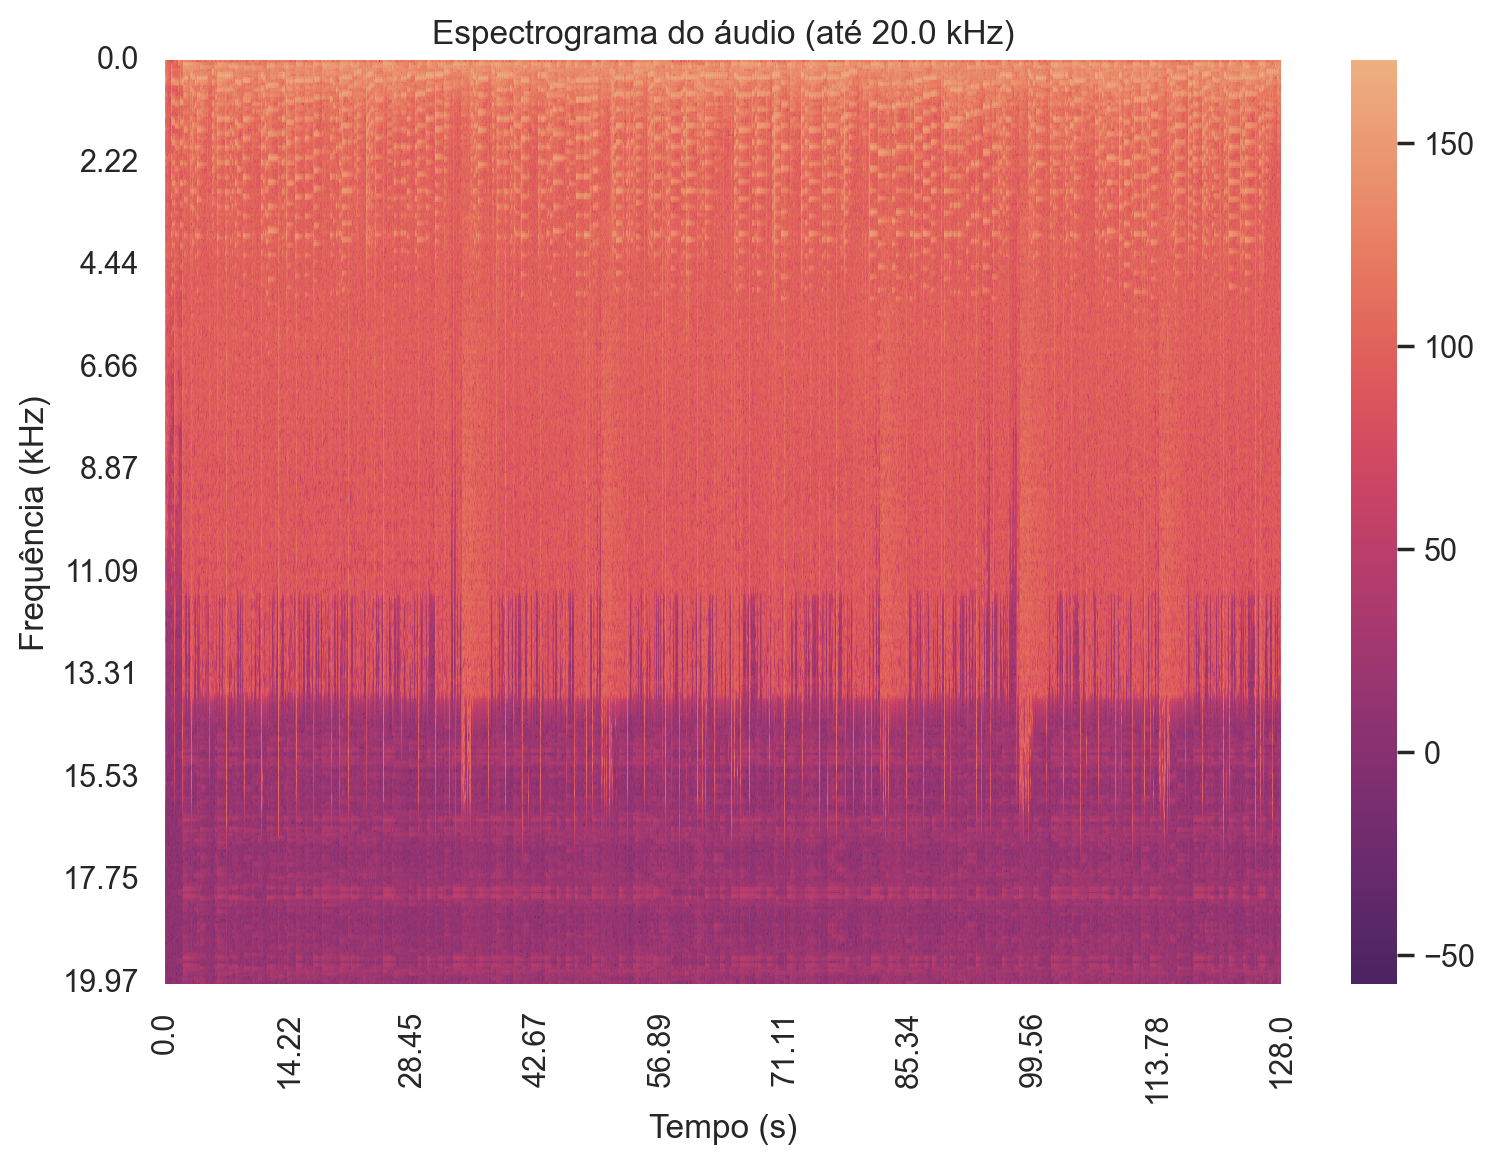

In [6]:
plotar_espectrograma(dados_wav, blackman_window, hop_size=NUM_PONTOS // 2, fs=fs, output_name="Blackman", freq_max=20000)

Como é visto no espectograma, o sinal não apresenta contéudo significativo para frequências acima de 14 kHz.

Devido à faixa de frequência mais significativa ocupada pelos instrumentos presentes na gravação da música, os próximos espectogramas são plotados para uma frequência máxima de 2000 Hz.

Espectograma obtido com a janela de Blackman.

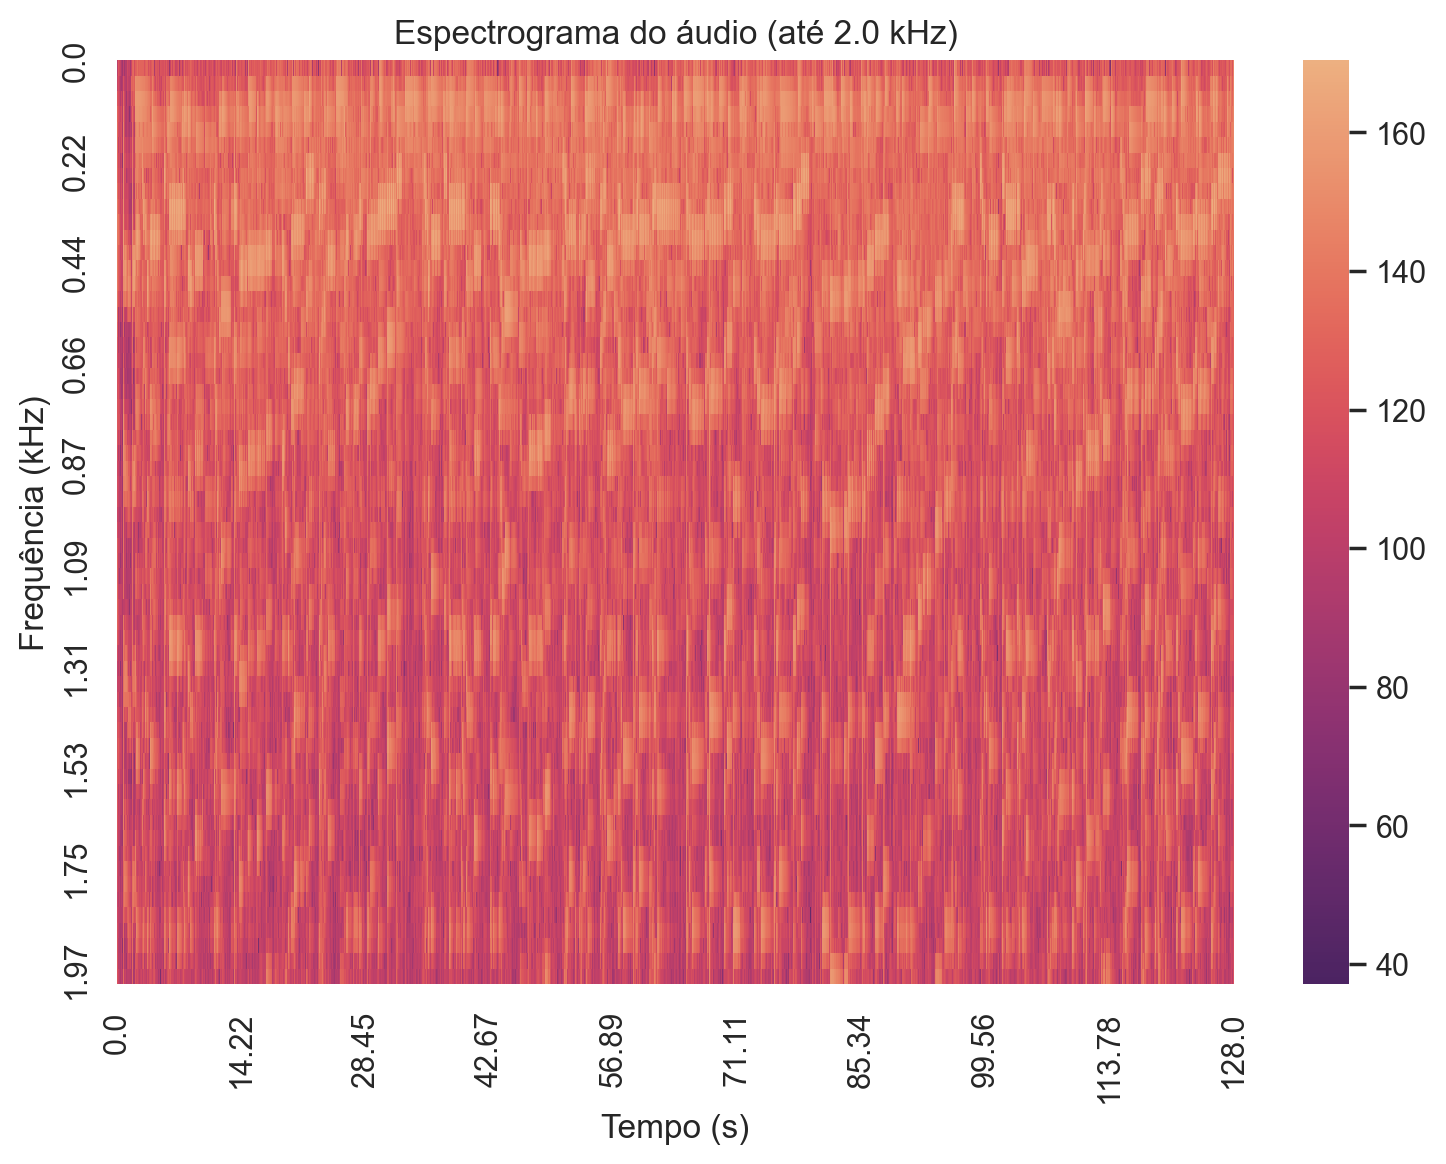

In [7]:
plotar_espectrograma(dados_wav, blackman_window, hop_size=NUM_PONTOS // 2, fs=fs, output_name="Blackman")

Espectograma obtido com a janela de Hann.

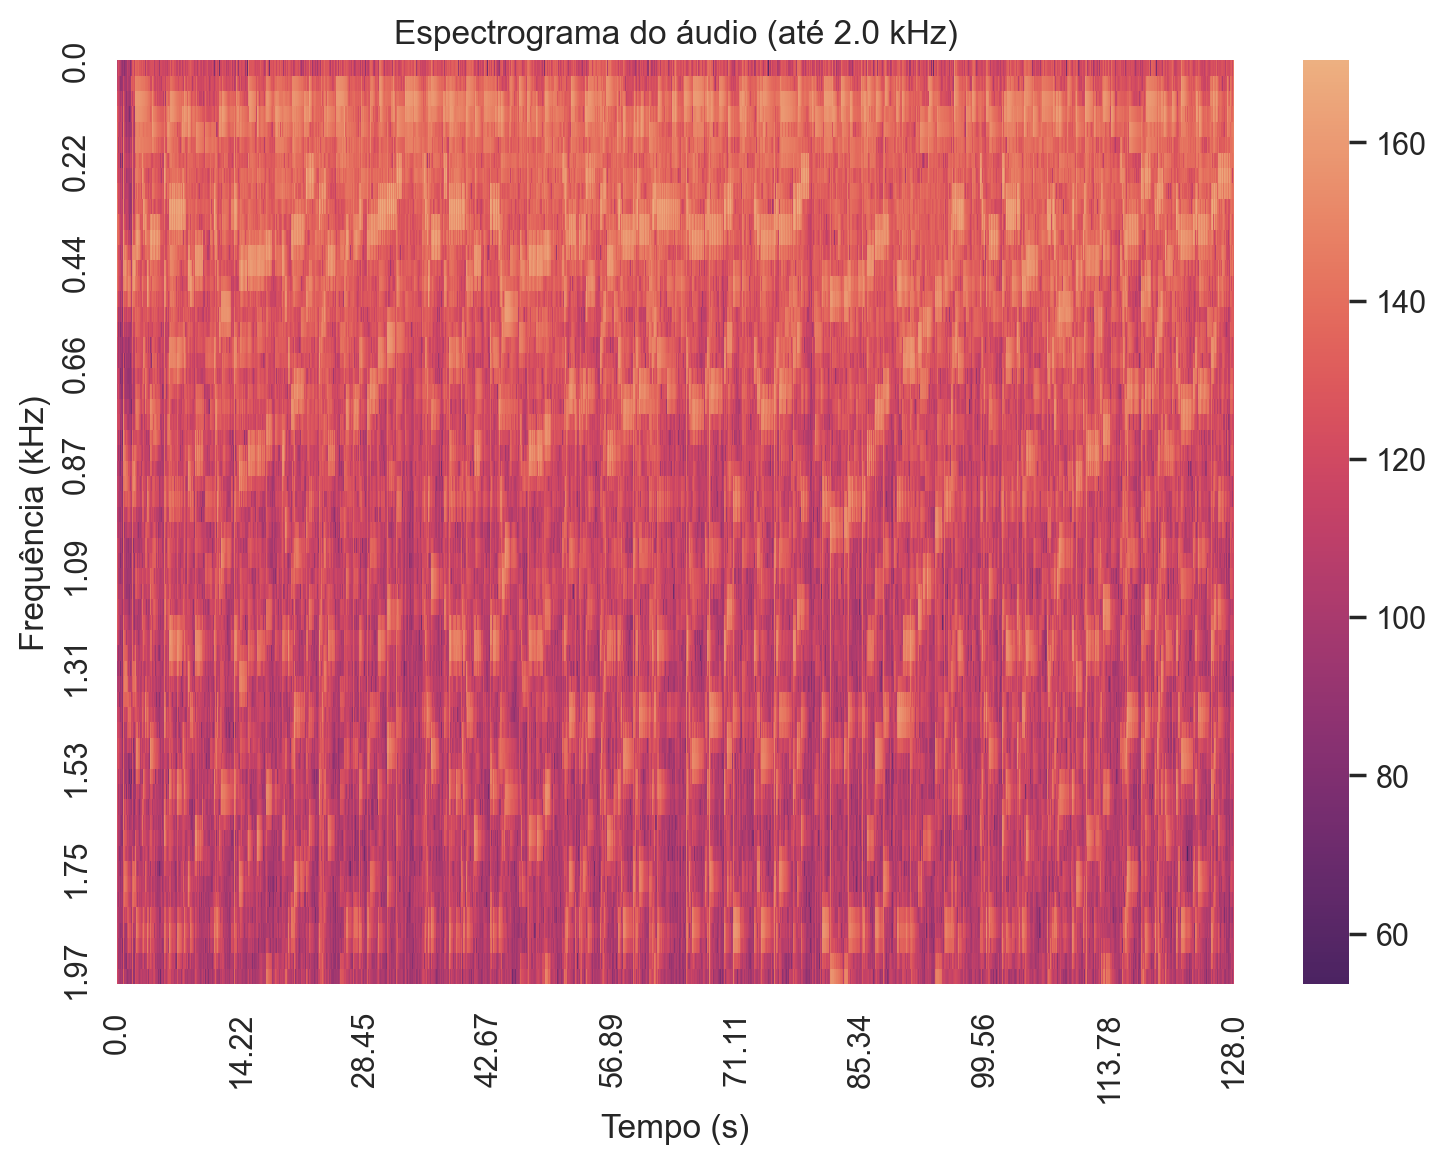

In [8]:
plotar_espectrograma(dados_wav, hann_window, hop_size=NUM_PONTOS // 2, fs=fs, output_name="Hann")

Espectograma obtido com a janela de Hamming.

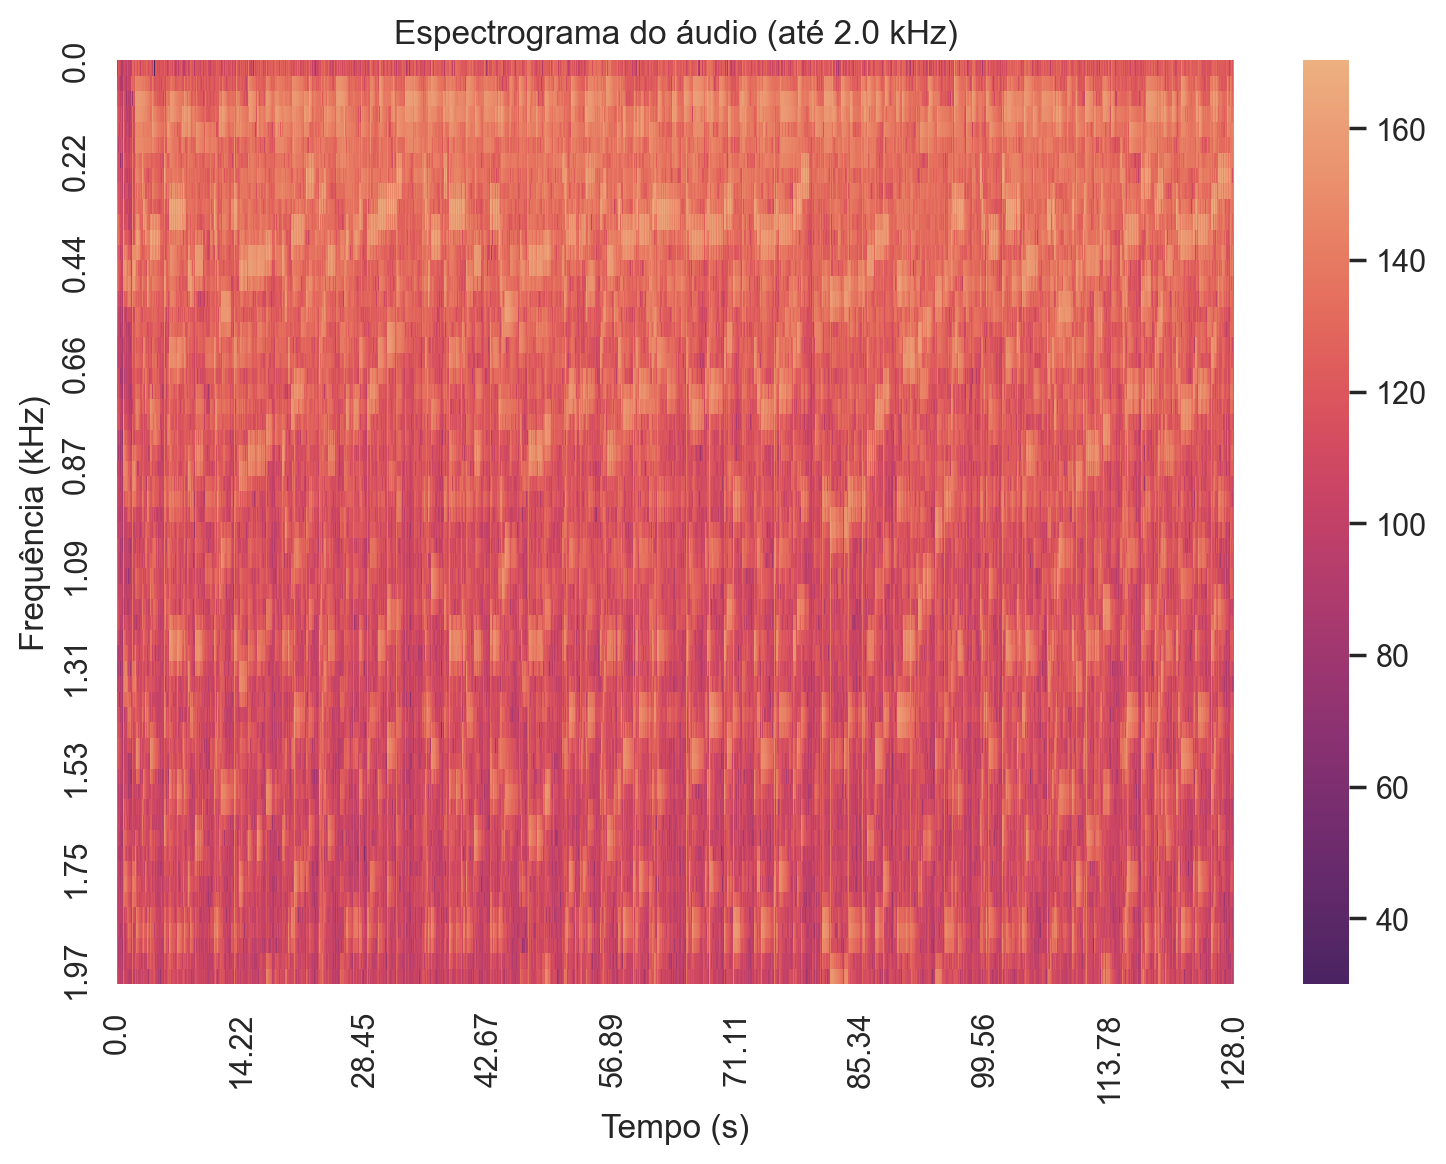

In [9]:
plotar_espectrograma(dados_wav, hamming_window, hop_size=NUM_PONTOS // 2, fs=fs, output_name="Hamming")

Os três espectogramas não apresentam dferenças muito sigficativas, o que é esperado, pois o mesmo sinal é analisado nos três casos, variando apenas a janela.

A resolução na frequência obtida com a janela de Hann é maior que a resolução obtida com as outras duas janelas. Ao mesmo tempo, a janela de Blackman apresenta um resolução temporal
levemente superior às outras duas janelas.

O próximo passo é analisar para a janela de Hamming, o efeito da variação do comprimento da janela no espectograma.

Definição de uma janela com 100 ms de comprimento e uma janela com 10 ms de comprimento.

In [10]:
NUM_PONTOS_10_MS = int(10 * fs / 1000)
NUM_PONTOS_100_MS = int(100 * fs / 1000)
# Janela de 10 ms
time_10_ms = np.linspace(0, 10 / 1000, NUM_PONTOS_10_MS)
hamming_window_10_ms = sps.windows.hamming(NUM_PONTOS_10_MS)
# Janela de 100 ms
time_100_ms = np.linspace(0, 100 / 1000, NUM_PONTOS_100_MS)
hamming_window_100_ms = sps.windows.hamming(NUM_PONTOS_100_MS)

Plotagem das janelas utilizidas.

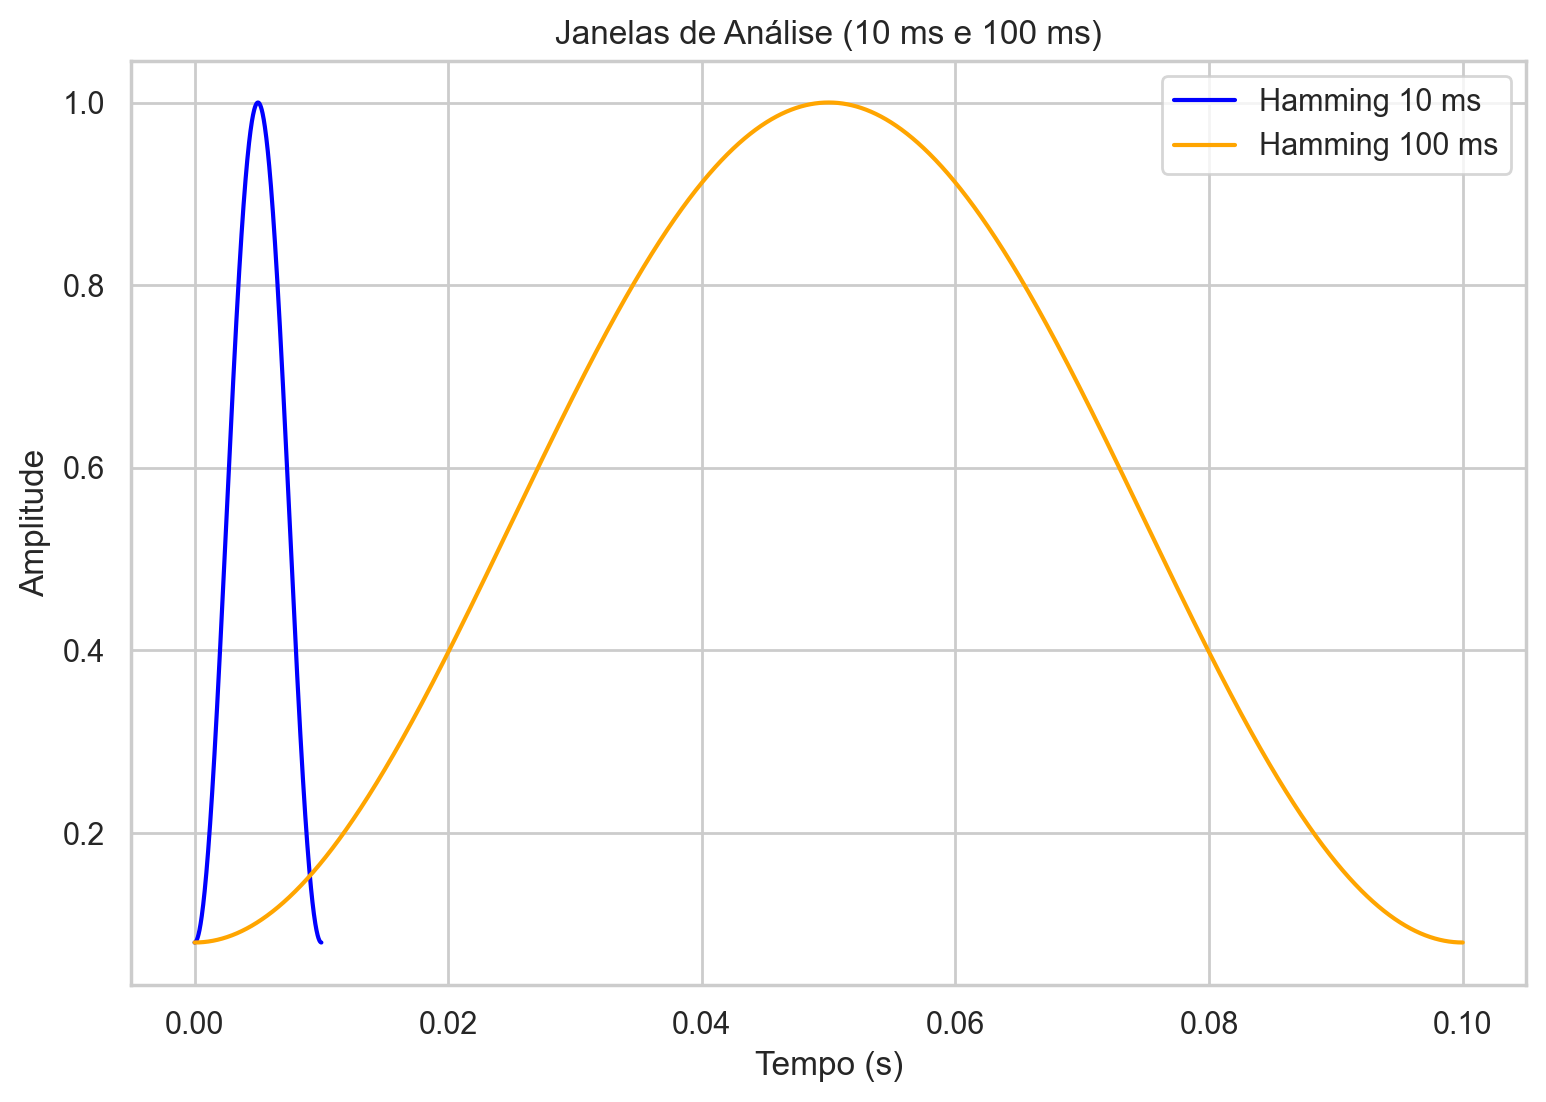

In [11]:
sns.lineplot(x=time_10_ms, y=hamming_window_10_ms, label='Hamming 10 ms', color='blue')
sns.lineplot(x=time_100_ms, y=hamming_window_100_ms, label='Hamming 100 ms', color='orange')
plt.title('Janelas de Análise (10 ms e 100 ms)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.savefig('janelas_10ms_100ms.png')

Espectograma obtido para a janela de 10 ms.

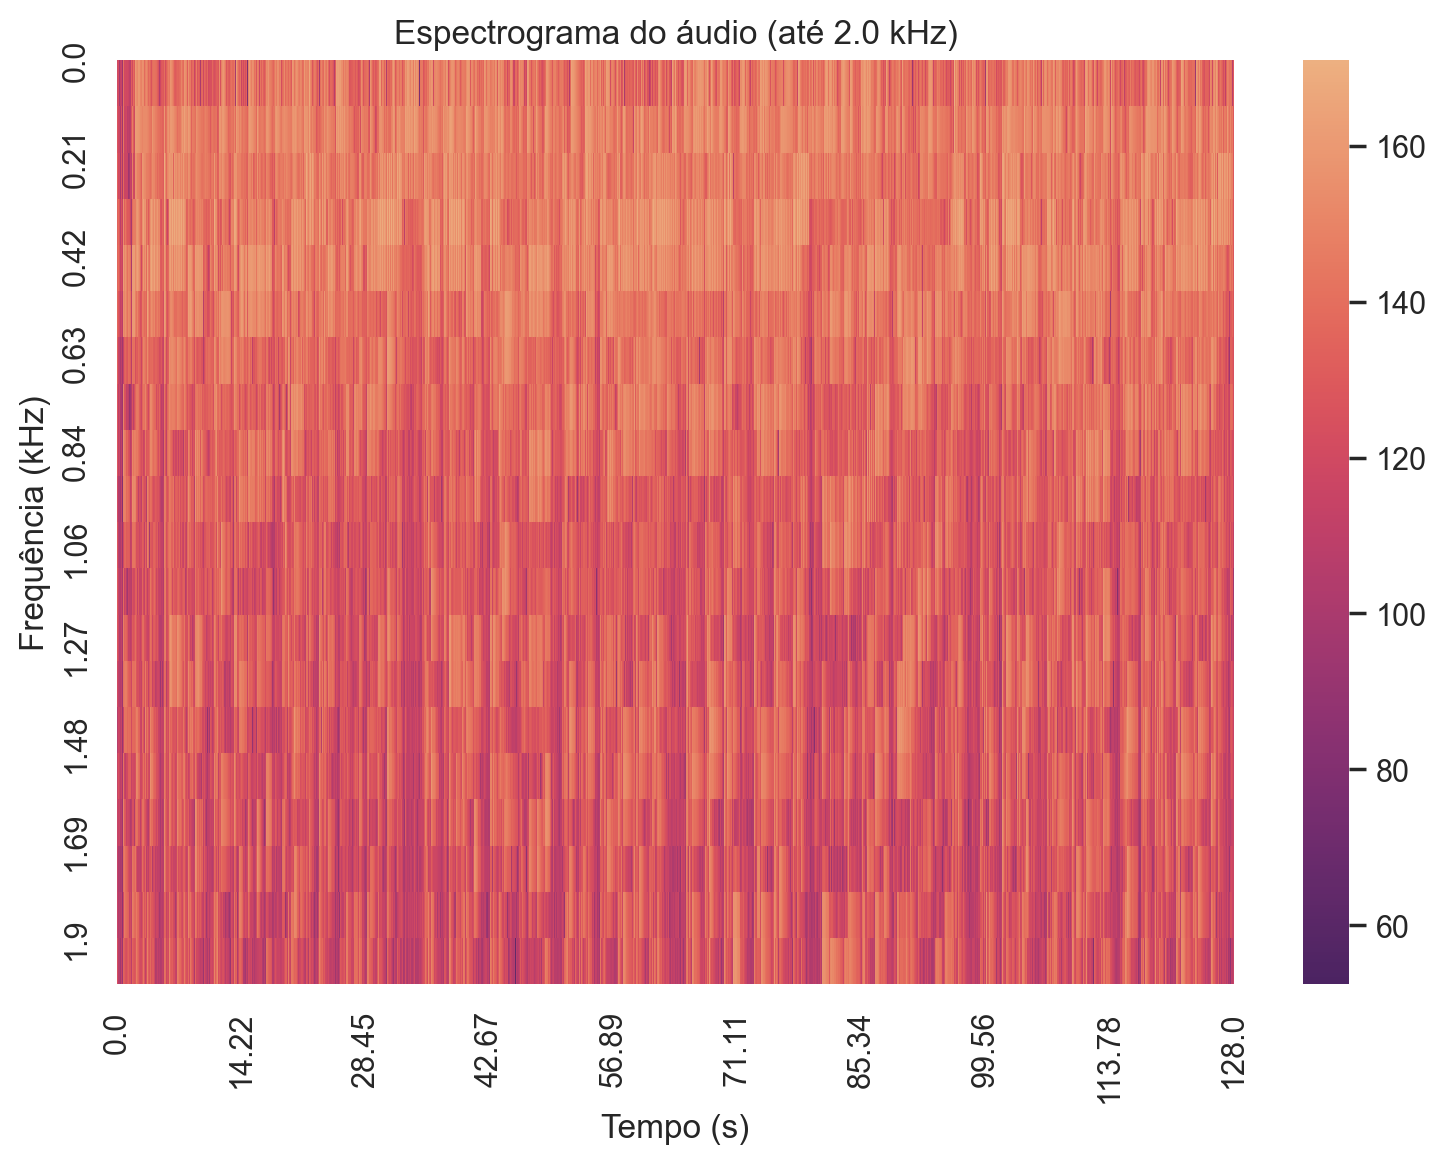

In [12]:
plotar_espectrograma(dados_wav, hamming_window_10_ms, hop_size=NUM_PONTOS_10_MS // 2, fs=fs, output_name="Hamming_10ms")

Espectograma obtido para a janela de 100 ms.

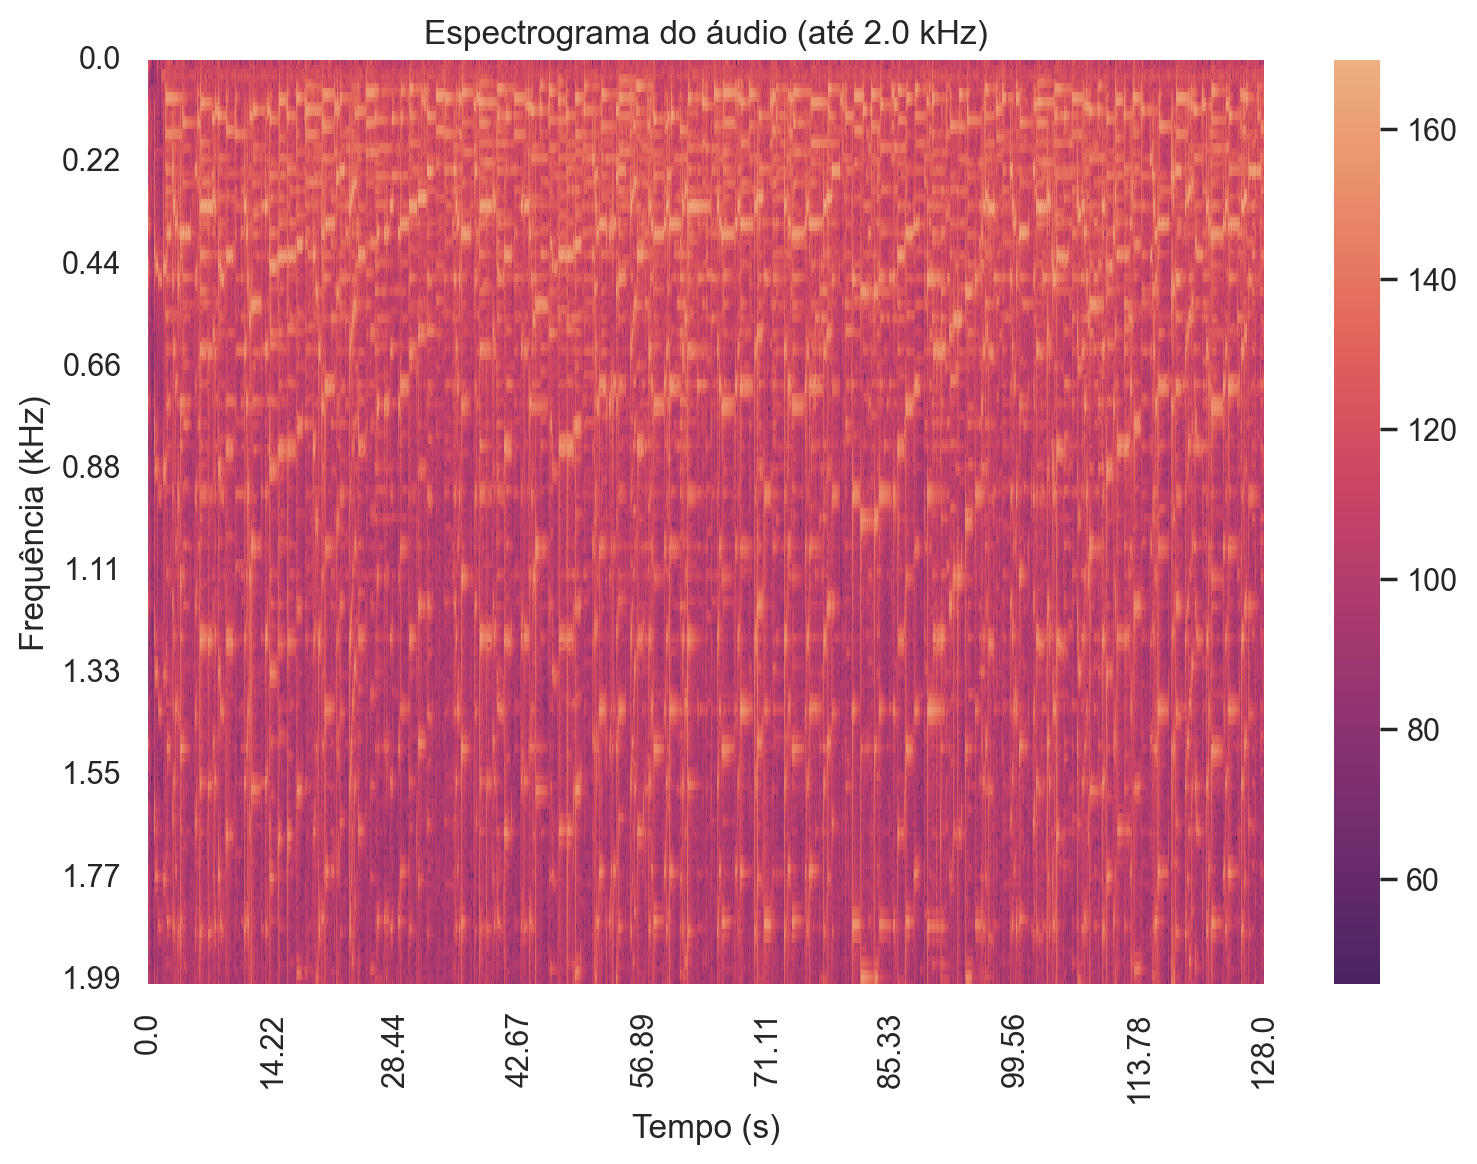

In [13]:
plotar_espectrograma(dados_wav, hamming_window_100_ms, hop_size=NUM_PONTOS_100_MS // 2, fs=fs, output_name="Hamming_100ms")

O espectrograma do sinal com a janela de 10 ms é espalhado na frequência, fenônemo ocorrido pelo príncipio da incerteza, que afirma não ser possível obter uma alta resolução na frequência e no tempo simultaneamente. Nesse caso, a maior resolução temporal obtida pela janela de 10 ms resultado num espectro de frequência borrado.

O espectograma do sinal com janela de 100ms apresenta uma boa resolução na frequência mas com perda na resolução temporal obtida.

## Parte 2 - Transformada Wavelet Discreta.

Definindo a transformada Wavelet com base na Wavelet mãe Daubechies 4.

In [14]:
import pywt
wavelet = pywt.Wavelet('db4')

Para poder visualizar melhor a aplicação da Transformada Wavelet Discreta, a transformada é aplicada com 12 níveis ao invés de 8 níveis.

O maior número de níveis ajuda na visualização da baixa frequência do sinal de áudio.

In [15]:
num_niveis = 12
dados_dwt = pywt.wavedec(dados_wav,wavelet,level=num_niveis)

In [16]:
def plot_wavelets(dwt_data:list,num_niveis:int) -> None:
    fig, axs = plt.subplots(num_niveis+1)
    fig.set_size_inches(10, 50)
    for i, dwt_i in enumerate(dwt_data):
        index = num_niveis-i
        axs[index].plot(dwt_i)
        if i == 0:
            axs[num_niveis].set_title(f"Coeficiente de aproximação:{num_niveis}")
        else:  
            axs[index].set_title(f"Coeficiente de detalhamento:{index+1}")
    axs[num_niveis].set_xlabel("Número de amostras")

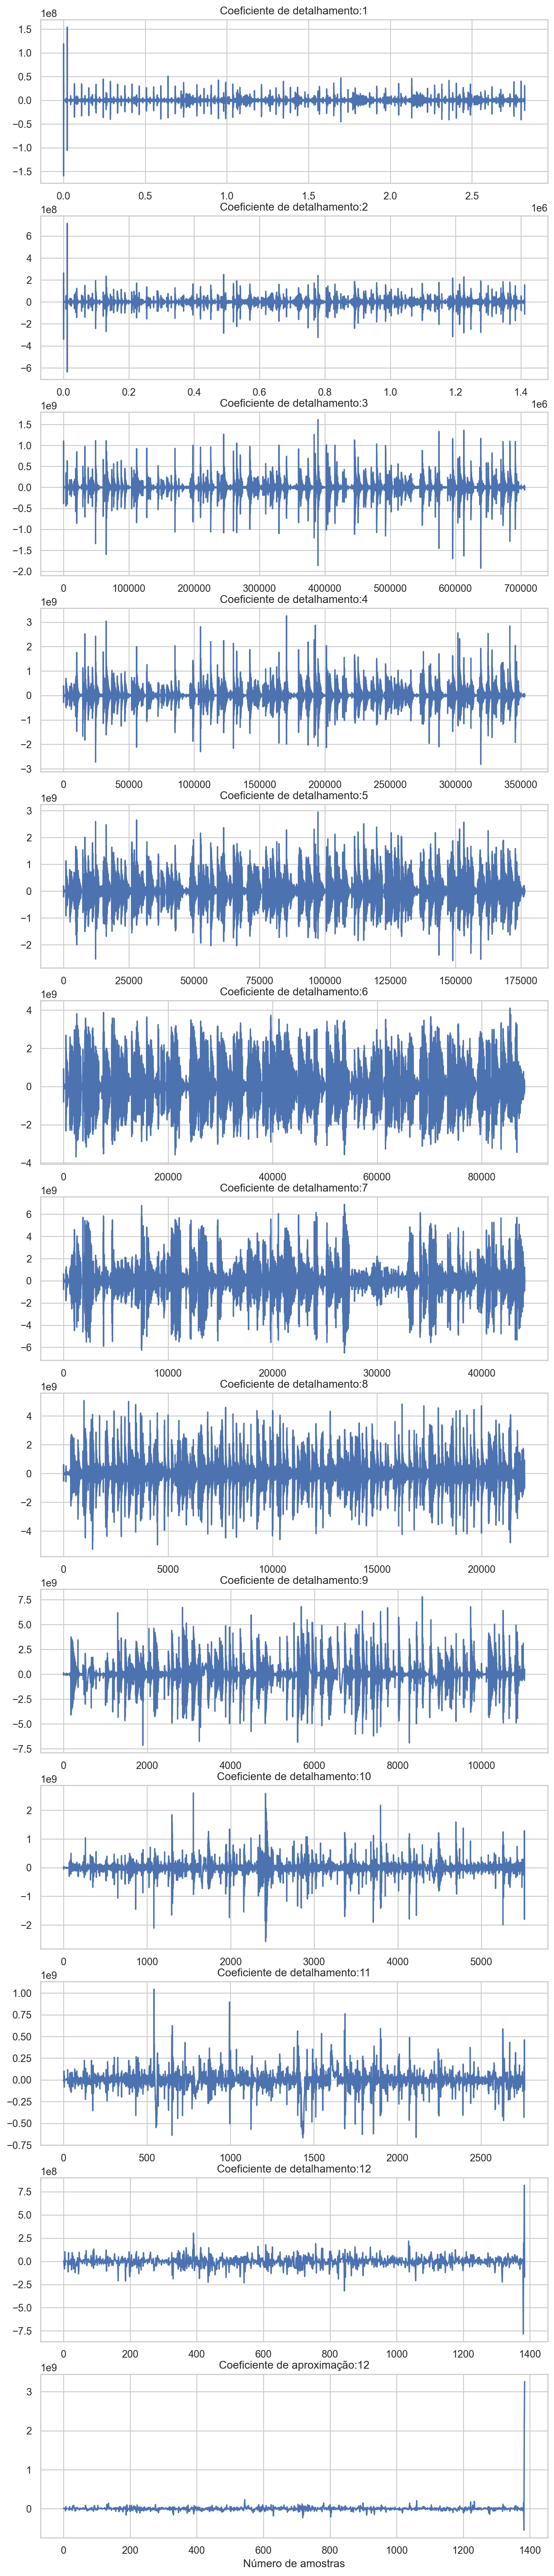

In [17]:
plot_wavelets(dados_dwt,num_niveis)

Pela decomposição do sinal com a Transformada Wavelet Discreta, é perceptível a baixa informação que o sinal de audio apresenta nas altas frequências (acima de 14kHz) e no subgrave. A mesma conclusão também foi obtida com a aplicação da Short Time Fourier Transform.

Em termos de desempenho, a plotagem da DWT com 12 níveis demora praticamente o tempo para a plotagem dos três espectogramas distintos na parte 1 da atividade.

Logo em seguida, o mesmo procedimento é realizado com a Wavelet Mãe Symlet 2.

In [18]:
wavelet = pywt.Wavelet('sym2')
dados_dwt = pywt.wavedec(dados_wav,wavelet,level=num_niveis)

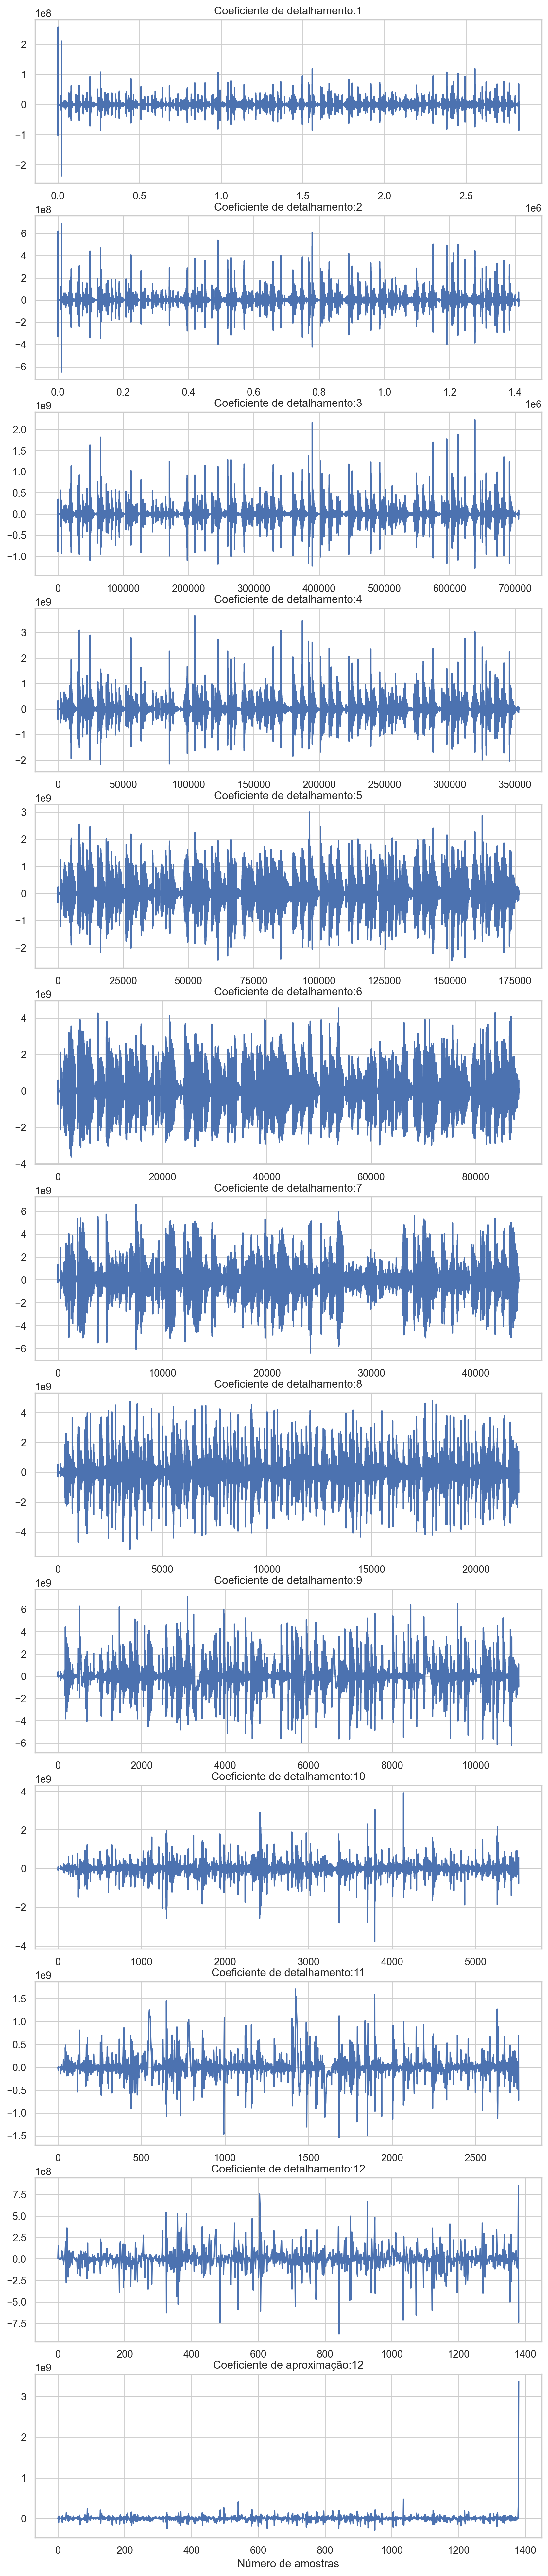

In [19]:
plot_wavelets(dados_dwt,num_niveis)

## Parte 3 - Transformada de Hilbert-Huang.